In [18]:
import random
from torchvision.transforms import functional as F

class RandomizedFlip:
    def __init__(self, flip_probability=0.5):
        """
        Args:
            flip_probability (float): Probability of applying a flip (default: 0.5).
        """
        self.flip_probability = flip_probability
        self.flip_type = "none"  # Initialize flip type

    def __call__(self, image, mask):
        """
        Randomly applies a horizontal flip, vertical flip, or both to the image and mask.

        Args:
            image (PIL Image): The input image.
            mask (PIL Image): The corresponding mask.

        Returns:
            (PIL Image, PIL Image): The flipped image and mask.
        """
        if random.random() < self.flip_probability:
            # Select the flip type and store it
            self.flip_type = random.choices(
                ['horizontal', 'vertical', 'both'], weights=[0.33, 0.33, 0.34], k=1
            )[0]
            
            print(f"Selected flip type: {self.flip_type}")
            
            if self.flip_type == 'horizontal':
                image = F.hflip(image)
                mask = F.hflip(mask)
            elif self.flip_type == 'vertical':
                image = F.vflip(image)
                mask = F.vflip(mask)
            elif self.flip_type == 'both':
                image = F.hflip(image)
                mask = F.hflip(mask)
                image = F.vflip(image)
                mask = F.vflip(mask)
        else:
            self.flip_type = "none"  # Set flip type to none if no flip is applied
            print("No flip applied")
            
        return image, mask


In [19]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the RGB mapping for each label
LABEL_TO_RGB = {
    0: (0, 0, 0),          # Black - Sea Surface
    1: (0, 255, 255),      # Cyan  - Oil Spill
    2: (255, 0, 0),        # Red   - Look-alike
    3: (153, 76, 0),       # Brown - Ship
    4: (0, 153, 0)         # Green - Land
}

def label_to_rgb(mask):
    # Create an empty RGB image
    height, width = mask.shape
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Map each label to its corresponding RGB value
    for label, color in LABEL_TO_RGB.items():
        rgb_image[mask == label] = color

    return rgb_image

Selected flip type: both


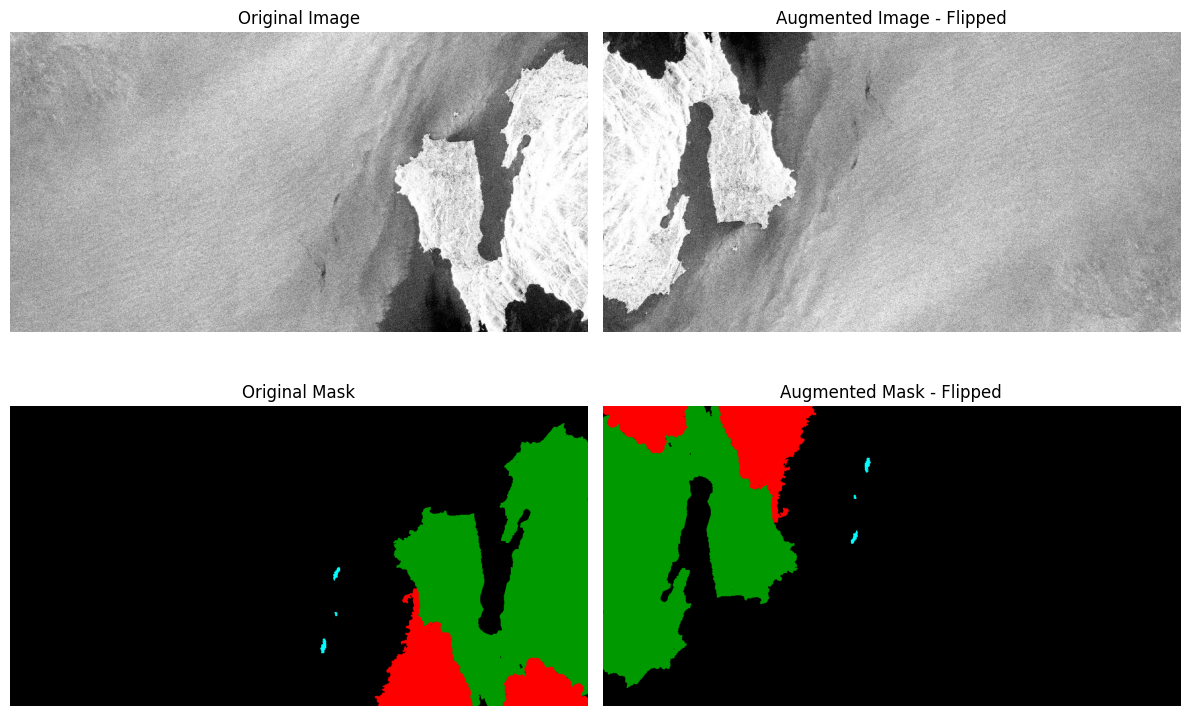

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the random flip augmentation
random_flip = RandomizedFlip()

# Define a sample image and mask
image_path = "../dataset/train/images/img_0212.jpg"
mask_path = "../dataset/train/labels_1D/img_0212.png"

# Load the image and mask
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("L")

# Apply the random flip augmentation
augmented_image, augmented_mask = random_flip(image, mask)

# Convert the mask to RGB for visualization
original_mask_rgb = label_to_rgb(np.array(mask))
augmented_mask_rgb = label_to_rgb(np.array(augmented_mask))

# =================== RESULTS ===================

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axs[0, 0].imshow(np.array(image))
axs[0, 0].set_title("Original Image")
# Original mask
axs[1, 0].imshow(original_mask_rgb)
axs[1, 0].set_title("Original Mask")
# Augmented image
axs[0, 1].imshow(np.array(augmented_image))
axs[0, 1].set_title(f"Augmented Image - Flipped")
# Augmented mask
axs[1, 1].imshow(augmented_mask_rgb)
axs[1, 1].set_title(f"Augmented Mask - Flipped")

# Remove axis ticks
for ax in axs.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()


### test with different images

Selected flip type: horizontal
No flip applied
Selected flip type: horizontal
Selected flip type: vertical
Selected flip type: both


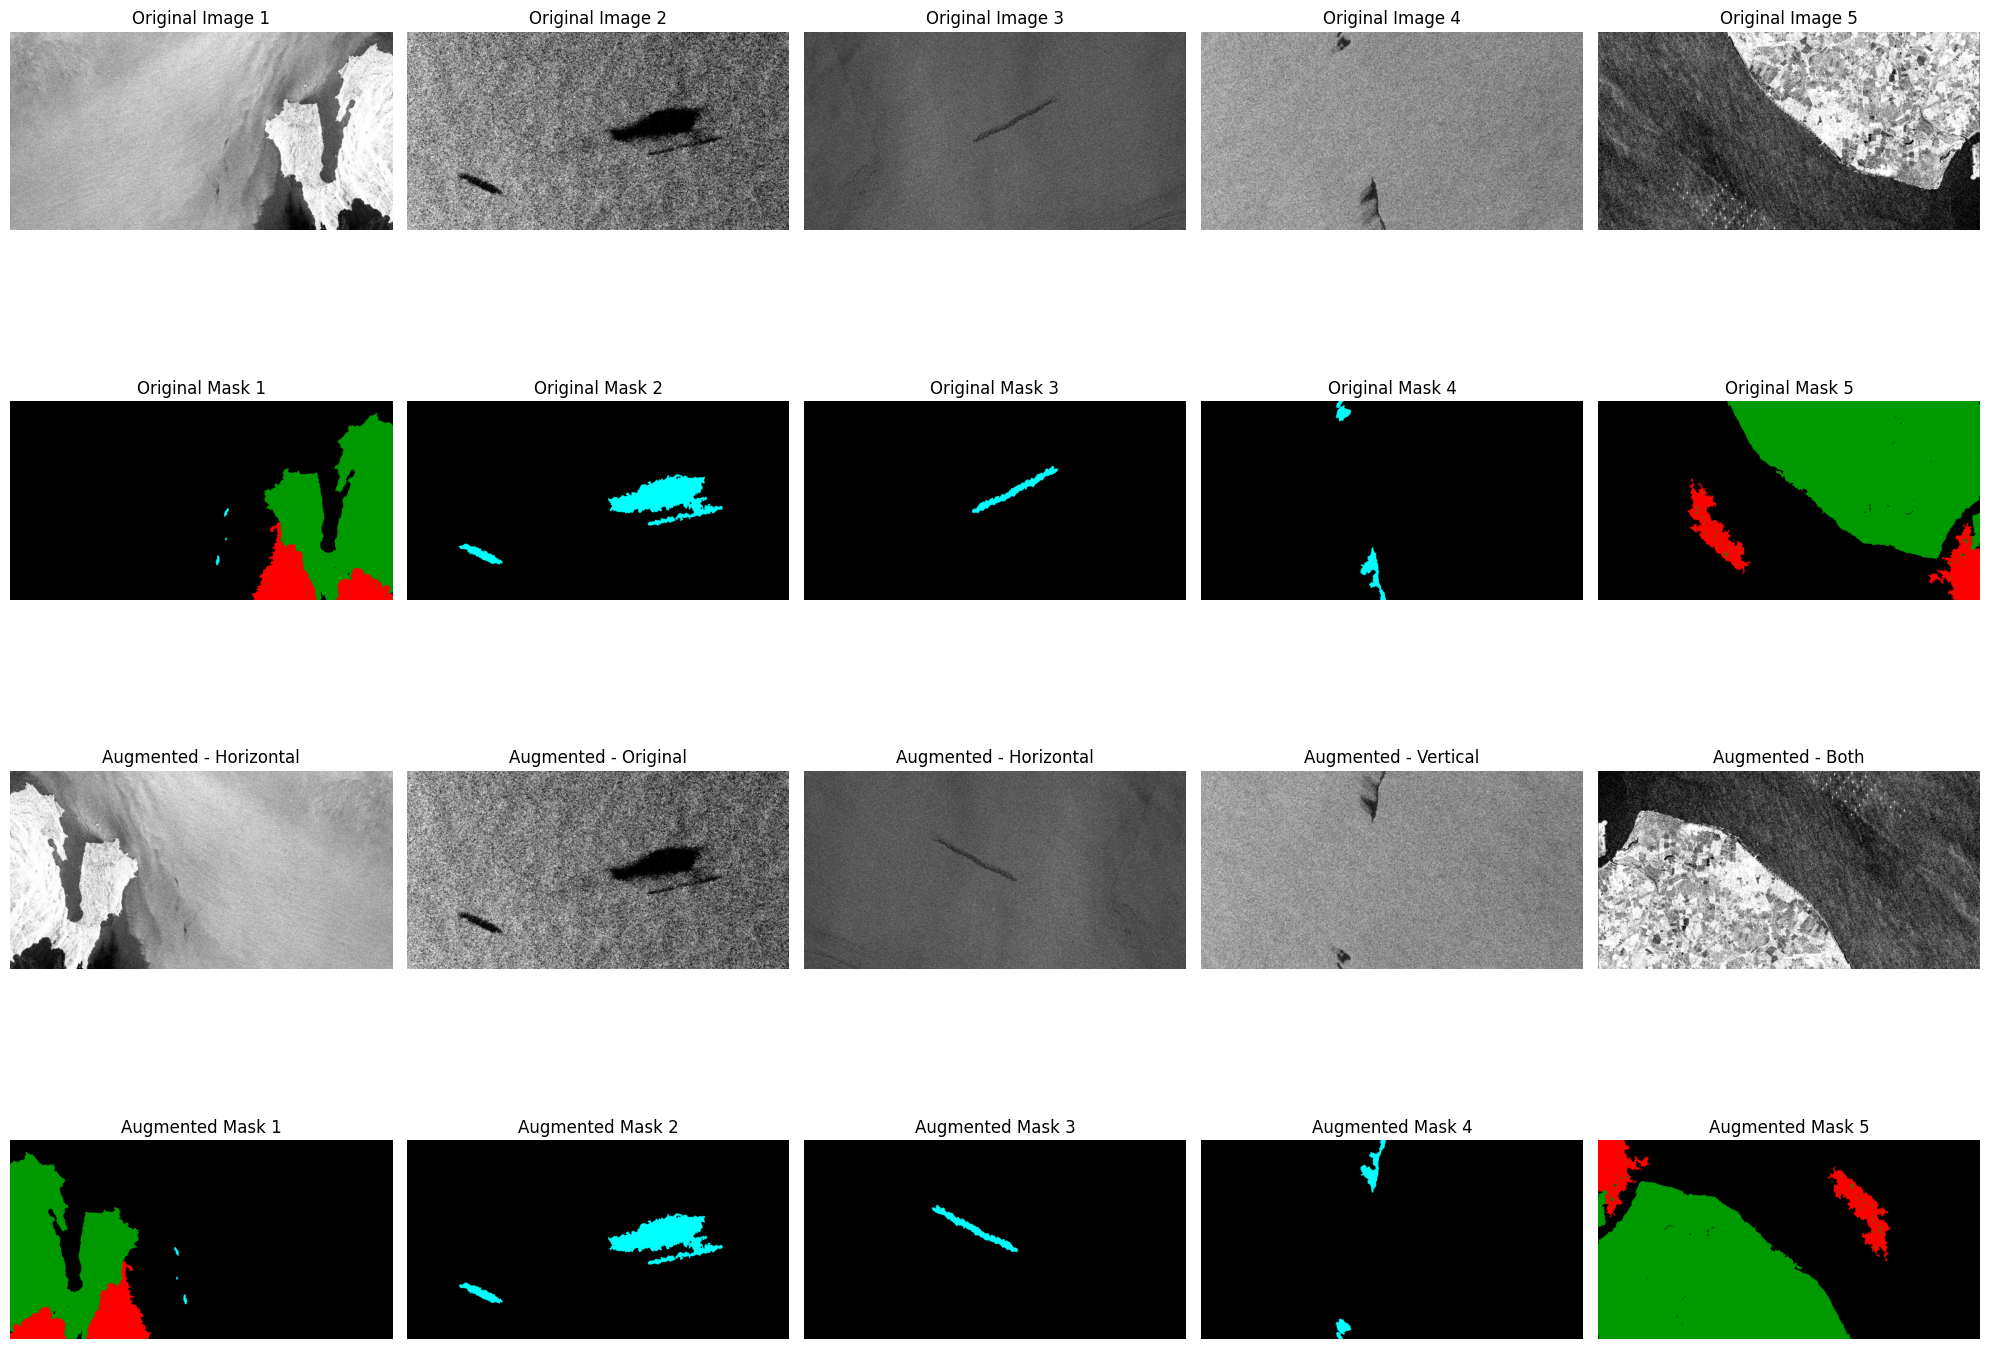

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Instantiate the RandomizedFlip augmentation
random_flip = RandomizedFlip(flip_probability=0.5)

# Define paths to 5 sample images and masks
image_paths = [
    "../dataset/train/images/img_0212.jpg",
    "../dataset/train/images/img_0213.jpg",
    "../dataset/train/images/img_0214.jpg",
    "../dataset/train/images/img_0215.jpg",
    "../dataset/train/images/img_0216.jpg"
]

mask_paths = [
    "../dataset/train/labels_1D/img_0212.png",
    "../dataset/train/labels_1D/img_0213.png",
    "../dataset/train/labels_1D/img_0214.png",
    "../dataset/train/labels_1D/img_0215.png",
    "../dataset/train/labels_1D/img_0216.png"
]

# Load images and masks
images = [Image.open(path).convert("RGB") for path in image_paths]
masks = [Image.open(path).convert("L") for path in mask_paths]

# Apply RandomizedFlip to all images and masks
augmented_images = []
augmented_masks = []
flip_types = []

for img, mask in zip(images, masks):
    aug_img, aug_mask = random_flip(img, mask)
    augmented_images.append(np.array(aug_img))
    augmented_masks.append(label_to_rgb(np.array(aug_mask)))
    flip_types.append(random_flip.flip_type if hasattr(random_flip, 'flip_type') else "none")
    
# =================== RESULTS ===================

fig, axs = plt.subplots(4, len(images), figsize=(20, 16))

# Plot the original and augmented images and masks
for i in range(len(images)):
    # Original image
    axs[0, i].imshow(np.array(images[i]))
    axs[0, i].set_title(f"Original Image {i + 1}")
    # Original mask
    axs[1, i].imshow(label_to_rgb(np.array(masks[i])))
    axs[1, i].set_title(f"Original Mask {i + 1}")
    # Augmented image with flip type in the title
    title_suffix = f"{flip_types[i].capitalize()}" if flip_types[i] != "none" else "Original"
    axs[2, i].imshow(augmented_images[i])
    axs[2, i].set_title(f"Augmented - {title_suffix}")
    # Augmented mask
    axs[3, i].imshow(augmented_masks[i])
    axs[3, i].set_title(f"Augmented Mask {i + 1}")

# Remove axis ticks
for ax in axs.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()
